# import lib

In [1]:
import pandas
import psycopg2
import configparser

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


# connect to db

In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd = config['myaws']['pwd']

conn = psycopg2.connect(  host=host,
                       user=user,
                       password = pwd,
                       dbname=db)

In [3]:
cur=conn.cursor()

# q1

In [4]:
df_student=pandas.read_sql_query('select * from gp16.student',conn)
df_student[:]

,s_email,s_name,major
0,doe@dukes.jmu.edu,John Doe,Intelligence Analysis
1,smith@dukes.jmu.edu,James Smith,Intelligence Analysis
2,hacketcb@dukes.jmu.edu,Caleb Hackett,Intelligence Analysis
3,rober6tl@dukes.jmu.edu,Thea Robertson,Intelligence Analysis


# q2

In [5]:
sql_statement2 = """ select gp16.professor.p_name,
                    gp16.course.c_name
                    from gp16.professor
                    inner join gp16.course
                    on gp16.professor.p_email = gp16.course.p_email"""

In [6]:
df_student=pandas.read_sql_query(sql_statement2,conn)
df_student[:]

,p_name,c_name
0,Noel Hendrickson,Counterfactual Reasoning
1,Stephen Marrin,Seminar on Isuues In Intelligence Analysis
2,Orlandrew Danzell,Money Laundering
3,new_p,Human Development
4,new_p,Data Mining
5,new_p,new_c_name


# q3

In [7]:
sql_statement3 = """ select c_number,
                    count (c_number) as enrolled
                    from gp16.enroll_list
                   group by c_number
                   """

<AxesSubplot:xlabel='c_number'>

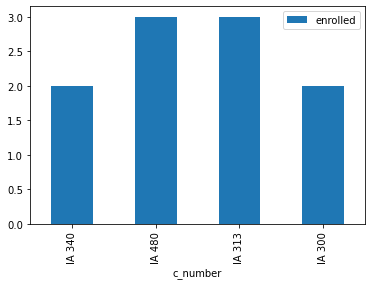

In [8]:
df_price=pandas.read_sql_query(sql_statement3,conn)

df_price.plot.bar(x='c_number',y='enrolled')

# q4

In [9]:
sql_statement4 = """ select gp16.professor.p_name,
                   count(gp16.course.c_name) as teaching_number
                    from gp16.professor
                    inner join gp16.course
                    on gp16.professor.p_email = gp16.course.p_email
                    group by professor.p_name
                   """

<AxesSubplot:xlabel='p_name'>

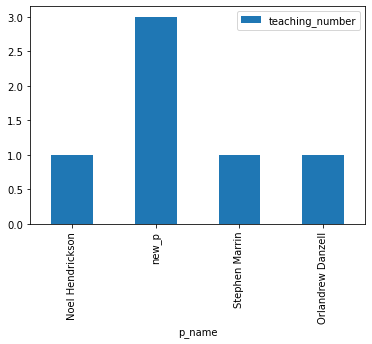

In [10]:
df_price=pandas.read_sql_query(sql_statement4,conn)

df_price.plot.bar(x='p_name',y='teaching_number')

# q5

In [22]:
sql_statement5 = """ insert into gp16.professor(p_email, p_name, p_office)
                    values ('{}', '{}', '{}')
                   """.format('new_pro@jmu.edu', 'new_pro', 'new_off')
print (sql_statement5)

 insert into gp16.professor(p_email, p_name, p_office)
                    values ('new_pro@jmu.edu', 'new_pro', 'new_off')
                   


In [23]:
cur.execute(sql_statement5)

In [24]:
df=pandas.read_sql_query("select * from gp16.professor",conn)

df[:]

,p_email,p_name,p_office
0,hendrinx@jmu.edu,Noel Hendrickson,ISAT 317
1,danzelox@jmu.edu,Orlandrew Danzell,ISAT 107
2,marrinsp@jmu.edu,Stephen Marrin,ENGEO2104
3,new_p@jmu.edu,new_p,new_office
4,new_pro@jmu.edu,new_pro,new_off


In [32]:
sql_statement6 = """ insert into gp16.course (c_number, c_name, c_room, p_email)
                    values ('{}', '{}', '{}', '{}')
                   """.format('new_ia', 'new_course', 'ISAT321', 'new_pro@jmu.edu')
print (sql_statement6)

 insert into gp16.course (c_number, c_name, c_room, p_email)
                    values ('new_ia', 'new_course', 'ISAT321', 'new_pro@jmu.edu')
                   


In [33]:
cur.execute(sql_statement5)

In [31]:
conn.rollback()

In [34]:
conn.commit()

In [35]:
df=pandas.read_sql_query("select * from gp16.professor",conn)

df[:]

,p_email,p_name,p_office
0,hendrinx@jmu.edu,Noel Hendrickson,ISAT 317
1,danzelox@jmu.edu,Orlandrew Danzell,ISAT 107
2,marrinsp@jmu.edu,Stephen Marrin,ENGEO2104
3,new_p@jmu.edu,new_p,new_office
4,new_pro@jmu.edu,new_pro,new_off


In [36]:
df=pandas.read_sql_query("select * from gp16.course",conn)

df[:]

,c_number,c_name,c_room,p_email
0,IA 313,Counterfactual Reasoning,ENGEO1204,hendrinx@jmu.edu
1,IA 300,Seminar on Isuues In Intelligence Analysis,ISAT 150,marrinsp@jmu.edu
2,IA 480,Money Laundering,ISAT0148,danzelox@jmu.edu
3,PSYCH160,Human Development,ISAT312,new_p@jmu.edu
4,IA 340,Data Mining,ENGEO210,new_p@jmu.edu
5,ia_new,new_c_name,ISAT123,new_p@jmu.edu


# q6

In [37]:
sql_statement7 = """ update gp16.course
                    set p_email = 'new_pro@jmu.edu'
                    where p_email = 'new_p@jmu.edu'
                  """
print (sql_statement7)

 update gp16.course
                    set p_email = 'new_pro@jmu.edu'
                    where p_email = 'new_p@jmu.edu'
                  


In [38]:
cur.execute(sql_statement7)

In [39]:
conn.commit()

In [40]:
df=pandas.read_sql_query("select * from gp16.course",conn)

df[:]

,c_number,c_name,c_room,p_email
0,IA 313,Counterfactual Reasoning,ENGEO1204,hendrinx@jmu.edu
1,IA 300,Seminar on Isuues In Intelligence Analysis,ISAT 150,marrinsp@jmu.edu
2,IA 480,Money Laundering,ISAT0148,danzelox@jmu.edu
3,PSYCH160,Human Development,ISAT312,new_pro@jmu.edu
4,IA 340,Data Mining,ENGEO210,new_pro@jmu.edu
5,ia_new,new_c_name,ISAT123,new_pro@jmu.edu


In [41]:
sql_statement8 = """ delete from gp16.professor
                    where p_email = 'new_p@jmu.edu'
                  """
print (sql_statement8)

 delete from gp16.professor
                    where p_email = 'new_p@jmu.edu'
                  


In [42]:
cur.execute(sql_statement8)

In [43]:
conn.commit()

In [44]:
df=pandas.read_sql_query("select * from gp16.professor",conn)

df[:]

,p_email,p_name,p_office
0,hendrinx@jmu.edu,Noel Hendrickson,ISAT 317
1,danzelox@jmu.edu,Orlandrew Danzell,ISAT 107
2,marrinsp@jmu.edu,Stephen Marrin,ENGEO2104
3,new_pro@jmu.edu,new_pro,new_off


# Close cursor and connection

In [45]:
cur.close()

In [46]:
conn.close()